# 지하철 시간대별 데이터 시각화하기

* 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
* 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까?

대중교통 데이터를 바탕으로 질문에 답해보자.

In [1]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
pwd

'/content'

In [1]:
## 코랩을 사용할 때
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것

%cd /content/drive/Othercomputers/내\ 노트북_before/Devpy/12.데이터분석/배포용

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Othercomputers/내 노트북_before/Devpy/12.데이터분석/배포용


In [4]:
pwd

'/content/drive/Othercomputers/내 노트북_before/Devpy/12.데이터분석/배포용'

In [5]:
#코랩의 경우
# 나눔고딕 폰트 인스톨
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (40.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

## 1. 지하철 시간대별 이용 현황 데이터 정제하기
---


In [2]:
# 라이브러리 로드
import pandas as pd

In [4]:
# 데이터 로드
df = pd.read_csv('./data/subwaytime.csv', encoding='cp949',thousands=',')
df.head()


,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"12,503","2,017","2,148",0,208,0,1,0,0,2022-09-03 10:18:29
2,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"2,631",320,688,2,7,0,0,0,0,2022-09-03 10:18:29
3,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"3,215",970,607,1,1,0,0,0,0,2022-09-03 10:18:29
4,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"3,575","1,177","1,455",1,30,0,0,0,0,2022-09-03 10:18:29


```
* 이상하게 데이터가 로드됩니다. 
* csv원본을 보고 이유를 찾아야합니다. 
* multi column 구조이기 때문입니다. 
```

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                617 non-null    object 
 1   호선명                617 non-null    object 
 2   역ID                617 non-null    float64
 3   지하철역               617 non-null    object 
 4   04:00:00~04:59:59  618 non-null    object 
 5   Unnamed: 5         618 non-null    object 
 6   05:00:00~05:59:59  618 non-null    object 
 7   Unnamed: 7         618 non-null    object 
 8   06:00:00~06:59:59  618 non-null    object 
 9   Unnamed: 9         618 non-null    object 
 10  07:00:00~07:59:59  618 non-null    object 
 11  Unnamed: 11        618 non-null    object 
 12  08:00:00~08:59:59  618 non-null    object 
 13  Unnamed: 13        618 non-null    object 
 14  09:00:00~09:59:59  618 non-null    object 
 15  Unnamed: 15        618 non-null    object 
 16  10:00:00~10:59:59  618 non

In [6]:
# 컬럼들좀 봐야겠네~~~

df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [7]:
df.columns.size

53

## 컬럼이름 새로만들기

컬럼명 패턴

**사용월 호선명 역ID 지하철명 4_승차 4_하차 5_승차 5_하차 ....... 3_승차 3하차**

In [17]:
#새로운 컬럼이름으로 만듬-정수현

new_cols = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4,28) :
    new_cols.append(f'{i % 24 }_승차')
    new_cols.append(f'{i % 24 }_하차')

In [13]:
#새로운 컬럼이름으로 만듬-박나현
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,28):
    a=i
    if i>=24:
        a=i-24
    new_cols.append(f'{a}_승차')
    new_cols.append(f'{a}_하차')


In [28]:
#새로운 컬럼이름으로 만듬-김현섭
new_cols = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4,24):
    new_cols.append(f'{i}_승차')
    new_cols.append(f'{i}_하차')

for i in range(0,4):
    new_cols.append(f'{i}_승차')
    new_cols.append(f'{i}_하차')

In [29]:
len(new_cols)

52

In [30]:
#작업일시를 제외하고 데이터만 추출
value = df.iloc[1:, : -1].values

In [31]:
value.shape

(617, 52)

In [32]:
#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value, columns=new_cols)
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"22,497","12,503","2,017","2,148",0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"8,948","2,631",320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"26,636","3,215",970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"14,726","3,575","1,177","1,455",1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,"1,632","3,635","2,766","15,329",...,"5,541","2,481",194,728,1,1,0,0,0,0


In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    object
 3   지하철역    617 non-null    object
 4   4_승차    617 non-null    object
 5   4_하차    617 non-null    object
 6   5_승차    617 non-null    object
 7   5_하차    617 non-null    object
 8   6_승차    617 non-null    object
 9   6_하차    617 non-null    object
 10  7_승차    617 non-null    object
 11  7_하차    617 non-null    object
 12  8_승차    617 non-null    object
 13  8_하차    617 non-null    object
 14  9_승차    617 non-null    object
 15  9_하차    617 non-null    object
 16  10_승차   617 non-null    object
 17  10_하차   617 non-null    object
 18  11_승차   617 non-null    object
 19  11_하차   617 non-null    object
 20  12_승차   617 non-null    object
 21  12_하차   617 non-null    object
 22  13_승차   617 non-null    ob

```
승하차와 관련한 숫자들의 타입이 object이다. 문자열이라는 의미
숫자로 형변환이 필요하겠다.
```

In [35]:
#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제 -str.replace(',','')

for col in new_df.columns[4:]:
    # print(col)
    new_df[col] = new_df[col].str.replace(',','')


In [37]:
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,22497,12503,2017,2148,0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,8948,2631,320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,26636,3215,970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,14726,3575,1177,1455,1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,5541,2481,194,728,1,1,0,0,0,0


In [39]:
for col in new_df.columns[4:]:
    new_df[col]  = new_df[col].astype('int64')

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    object
 3   지하철역    617 non-null    object
 4   4_승차    617 non-null    int64 
 5   4_하차    617 non-null    int64 
 6   5_승차    617 non-null    int64 
 7   5_하차    617 non-null    int64 
 8   6_승차    617 non-null    int64 
 9   6_하차    617 non-null    int64 
 10  7_승차    617 non-null    int64 
 11  7_하차    617 non-null    int64 
 12  8_승차    617 non-null    int64 
 13  8_하차    617 non-null    int64 
 14  9_승차    617 non-null    int64 
 15  9_하차    617 non-null    int64 
 16  10_승차   617 non-null    int64 
 17  10_하차   617 non-null    int64 
 18  11_승차   617 non-null    int64 
 19  11_하차   617 non-null    int64 
 20  12_승차   617 non-null    int64 
 21  12_하차   617 non-null    int64 
 22  13_승차   617 non-null    in

## 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
---
아침 7시 승차 데이터의 위치를 확인하니 10번 인덱스에 저장되었있음을 확인할 수 있다.

In [41]:
new_df['7_승차']

0      39560
1       6430
2       5801
3       4642
4       5251
       ...  
612     9575
613     3212
614    10158
615    19371
616     4375
Name: 7_승차, Length: 617, dtype: int64

이 결과를 막대그래프로 표현해보자.

In [42]:
len(new_df)

617

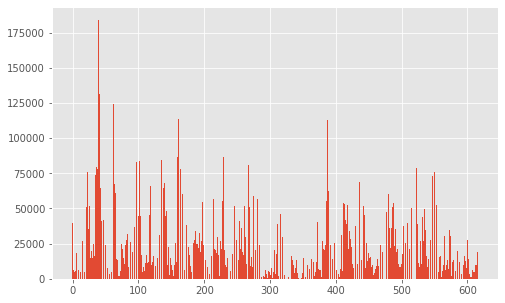

In [45]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')  #스타일 지정

plt.figure(figsize=(8, 5)) #스케치북 사이즈

plt.bar( range(len(new_df) ), new_df['7_승차'] ) # X, Y 꼭 지정

plt.show()

한개의 역이 다른 역들과는 큰 차이를 두고 많다는 것을 알 수 있다. 

그러면 출근 시간대라고 할 수 있는 7-9시까지 승차 인원을 합치면 어떻게 될까? (출근시간대_승차합계)

In [46]:
new_df['출근시간대_승차합계']  = new_df['7_승차'] + new_df['8_승차'] + new_df['9_승차']
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,12503,2017,2148,0,208,0,1,0,0,154546
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,2631,320,688,2,7,0,0,0,0,25005
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,3215,970,607,1,1,0,0,0,0,27170
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,3575,1177,1455,1,30,0,0,0,0,25674
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,2481,194,728,1,1,0,0,0,0,26373


그러면 출근 시간대에 사람들이 가장 많이 내리는 역은 어디일까?

In [47]:
new_df.sort_values(by='출근시간대_승차합계',ascending=False).iloc[0,3]


'신림'

## 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까
---


In [ ]:
import pandas as pd

df = pd.read_csv('./data/subwaytime.csv',encoding='cp949')

#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,24):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

for i in range(0,4):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

#데이터프레임에서 컬럼영역을 제외하고 데이터만 추출
value = df.iloc[1:,:-1].values

#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value,columns=new_cols)

#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].str.replace(',','')
for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

In [ ]:
#23시 승차로 정렬


In [ ]:
#밤 11시에 사람들이 가장 많이 타는 역은?


## 4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까
---


In [ ]:
import pandas as pd

df = pd.read_csv('./data/subwaytime.csv',encoding='cp949')

#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,24):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

for i in range(0,4):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

#데이터프레임에서 컬럼영역을 제외하고 데이터만 추출
value = df.iloc[1:,:-1].values

#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value,columns=new_cols)

#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].str.replace(',','')
for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

In [ ]:
name_lst = []
count_lst = []


이 데이터를 바탕으로 막대그래프를 그려보자.

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')

plt.bar(range(24), count_lst)
plt.xticks(range(24), name_lst , rotation =90)
plt.show()


x축에 시간이 표시되어 있지 않아서 알아보기 어렵다.

In [ ]:
name_lst = []
count_lst = []



In [ ]:
plt.bar(range(24), count_lst)
plt.xticks(range(24), name_lst , rotation =90)
plt.show()


## 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면
---
__만약 모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과를 확인할 수 있을까?__

이 질문을 해결하기 위한 알고리즘은 다음과 같이 간단히 생각할 수 있다.

1. 데이터를 읽어온다.
2. 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.
3. 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

In [ ]:
import pandas as pd

df = pd.read_csv('./data/subwaytime.csv',encoding='cp949')

#새로운 컬럼이름으로 만듬
new_cols = ['사용월', '호선명', '역ID', '지하철역']

for i in range(4,24):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

for i in range(0,4):
    txt1 = str(i) + '_승차'
    new_cols.append(txt1)
    
    txt2 = str(i) + '_하차'
    new_cols.append(txt2)

#데이터프레임에서 컬럼영역을 제외하고 데이터만 추출
value = df.iloc[1:,:-1].values

#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value,columns=new_cols)

#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제

for col in new_df.columns[4:]:
    new_df[col] = new_df[col].str.replace(',','')
for col in new_df.columns[4:]:
    new_df[col] = new_df[col].astype('int64')

    
new_df.head()

In [ ]:
#컬럼별 총합









In [ ]:
#새로운 데이터프레임으로 만들기


In [ ]:
s_in = []
s_out = []



> * 출근 시간대는 7-8시, 8-9시에 승차 인원이 많고, 하차 인원은 8-9시가 눈에 띄게 많습니다. 
> * 퇴근 시간대는 승차는 18-19시에 눈에 띄게 많고, 하차는 18-19시, 19-20시에 가장 많은 것을 볼 수 있습니다. 